<a href="https://colab.research.google.com/github/jeissongarciacano/AnalisisPy/blob/main/Riesgo_y_Rendimiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#IMPORTAR LIBRERÍAS
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [ ]:
#Conexión de datos
tickers = ['PG', 'GOOGL', 'AMZN', 'GE']
datos = pd.DataFrame()

for t in tickers:
    datos[t] = yf.download(t, start = '2019-01-01')['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
#Validación de cargue de datos
datos.head(10)

,PG,GOOGL,AMZN,GE
Date,,,,
2019-01-02,83.594475,52.734001,76.956497,61.043213
2019-01-03,83.008362,51.273499,75.014000,61.119045
2019-01-04,84.702591,53.903500,78.769501,62.408150
2019-01-07,84.363762,53.796001,81.475502,66.275482
2019-01-08,84.675125,54.268501,82.829002,64.910538
2019-01-09,83.292274,54.082500,82.971001,64.455566
2019-01-10,83.493736,53.941502,82.810997,67.792091
2019-01-11,84.043221,53.223499,82.028000,67.792091
2019-01-14,83.475426,52.575500,80.860497,67.488770


In [ ]:
datos.tail(10)

,PG,GOOGL,AMZN,GE
Date,,,,
2022-07-07,146.000000,118.782997,116.330002,63.000000
2022-07-08,145.020004,119.353500,115.540001,63.250000
2022-07-11,146.039993,115.676498,111.750000,61.910000
2022-07-12,144.750000,114.020500,109.220001,63.020000
2022-07-13,145.699997,111.353500,110.400002,62.009998
2022-07-14,145.270004,110.367500,110.629997,61.090000
2022-07-15,145.070007,111.777496,113.550003,62.860001
2022-07-18,143.309998,109.029999,113.760002,63.680000
2022-07-19,144.039993,113.809998,118.209999,66.739998


<AxesSubplot:xlabel='Date'>

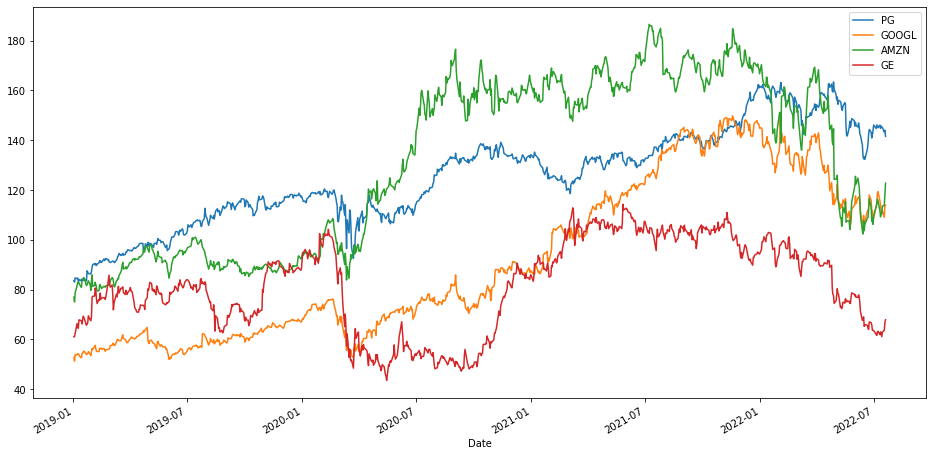

In [ ]:
datos.plot(figsize = (16,8))

# Retorno Simple

In [ ]:
serieRetornos = (datos/datos.shift(1)) - 1

In [ ]:
serieRetornos.plot(figsize = (16,8))
plt.show()

In [ ]:
retornoPG = serieRetornos['PG'].mean() * 250
print(f'El retorno de la acción es {round(retornoPG, 4) * 100}%')

In [ ]:
retornoGoogle = serieRetornos['GOOGL'].mean() * 250
print(f'El retorno de la acción es {round(retornoGoogle, 4) * 100}%')

In [ ]:
retornoAmazon = serieRetornos['AMZN'].mean() * 250
print(f'El retorno de la acción es {round(retornoAmazon, 4) * 100}%')

In [ ]:
retornoGe = serieRetornos['GE'].mean() * 250
print(f'El retorno de la acción es {round(retornoGe, 4) * 100}%')

# Retorno Logarítmico

In [ ]:
#Retorno Logarítmico
retornoLogaritmico = np.log(datos/datos.shift(1))
retornoLogaritmico.plot(figsize = (16,8))
plt.show()

In [ ]:
retornoLogPG = retornoLogaritmico['PG'].mean() * 250
print(f'El retorno de la acción es {round(retornoLogPG, 4) * 100}%')

In [ ]:
retornoLogGoogle = retornoLogaritmico['GOOGL'].mean() * 250
print(f'El retorno de la acción es {round(retornoLogGoogle, 4) * 100}%')

In [ ]:
retornoLogAmazon = retornoLogaritmico['AMZN'].mean() * 250
print(f'El retorno de la acción es {round(retornoLogAmazon, 4) * 100}%')

In [ ]:
retornoLogGe = retornoLogaritmico['GE'].mean() * 250
print(f'El retorno de la acción es {round(retornoLogGe, 4) * 100}%')

# Rendimiento de Portafolio

In [ ]:
#Rendimiento de Portafolio
pesos = np.array([0.25, 0.25, 0.25, 0.25])
retornoPortafolio = np.dot((serieRetornos.mean()*250), pesos)
print(f'El retorno del portafolio es {round(retornoPortafolio, 4) * 100}%')

# Riesgo de Portafolio

# Matriz de covarianza

In [ ]:
matrizCovarianza = retornoLogaritmico.cov()
matrizCovarianza

In [ ]:
matrizCovarianzaAnual = matrizCovarianza * 250
matrizCovarianzaAnual

# Matriz de Correlación

In [ ]:
matrizCorrelacion = retornoLogaritmico.corr()
matrizCorrelacion

In [ ]:
#Cálculo del riesgo
varianzaPortafolio = np.dot(pesos.T, np.dot(matrizCovarianzaAnual, pesos))
varianzaPortafolio

In [ ]:
volatilidadPortafolio = np.sqrt(varianzaPortafolio)
volatilidadPortafolio